# <span style="color:green"> Laboratorio di Simulazione Numerica </span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

### Esercizio 01.1
L'esercizio richiede di testare il buon funzionamento del generatore di numeri pseudo-casuali.

1) La prima richiesta è stimare il valor medio della distribuzione uniforme nell'intervallo [0,1):
$$ \langle r \rangle = \int_0^1 r dr = 1/2.$$
   
Ho effettuato la stima estraendo complessivamente $M=10^{7}$ numeri pseudo-casuali dalla distribuzione uniforme nell'intervallo $[0,1)$. 
Per effettuare la stima, ho sfruttato la media a blocchi, con $N=100$ blocchi:
- per l'i-esimo blocco, ho calcolato il valore dell'integrale $r_{i}$ come media dei $L=M/N$ numeri pseudo-randomici estratti nel blocco;
- ho valutato il valore dell'integrale al crescere delle iterazioni: per i primi $L$ lanci (primo blocco), il valore dell'integrale è $r_{0}$, per i primi $2L$ lanci (primo e secondo blocco), il valore dell'integrale è $(r_{0}+r_{1})/2$, per $N \cdot L$ lanci (N blocchi), il valore dell'integrale è $(r_{0}+r_{1}+...+r_{N-1})/N$.

I risultati ottenuti, con la relativa incertezza statistica, calcolata come deviazione standard del valor medio, sono visualizzati nel plot. 

I risultati sono compatibili entro 1$\sigma$ con il valore atteso $1/2$.

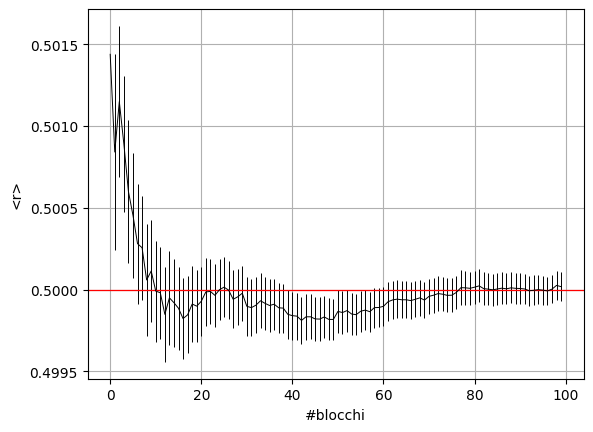

In [2]:
x, f, error = np.loadtxt("OUTPUT/N_integral_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,f,yerr=error,  color='black', linewidth=0.7)
plt.axhline(y=0.5, color='red', linewidth=0.9)
plt.xlabel('#blocchi')
plt.ylabel('<r>')
plt.grid(True)
plt.show()

2) Viene poi richiesto di stimare la varianza $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12.$

Ho seguito lo stesso procedimento descritto al punto 1, ma valutando la quantità $(r-1/2)^2$, con $r$ numero pseudo-casuale estratto dalla distribuzione uniforme nell'intervallo [0,1).
I risultati sono compatibili entro 1$\sigma$ con il valore atteso $1/12$.

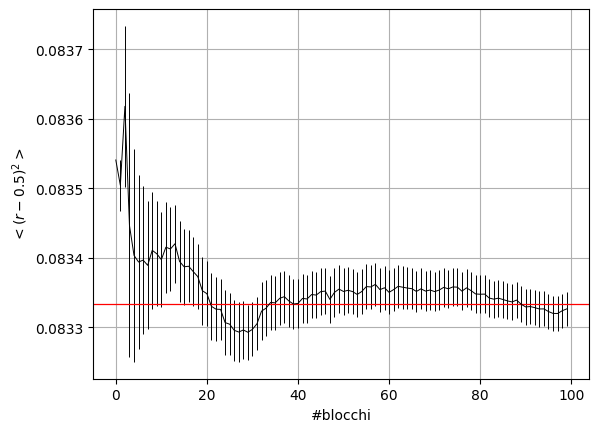

In [3]:
x, f, error = np.loadtxt("OUTPUT/N_sigma2_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

plt.errorbar(x,f,yerr=error, color='black', linewidth=0.7)
plt.axhline(y=1/12, color='red', linewidth=0.9)
plt.xlabel('#blocchi')
plt.ylabel('$<(r-0.5)^2>$')
plt.grid(True)
plt.show()

3) Attraverso un test del $\chi^2$ è possibile stabilire se il campione estratto sia estratto da una distribuzione uniforme.

Ho suddiviso l'intervallo $[0,1]$ in $M=10^2$ sottointervalli identici, individuati dall'indice $i$; ho estratto $n=10^4$ numeri pseudocasuali ed ho contato i valori $n_{i}$ estratti in ciascun sotto-intervallo $i$. Se la distribuzione da cui sono estratti i numeri è uniforme, in ciascun sotto-intervallo mi aspetto di contare $n/M$ numeri estratti. Il $\chi^2$ atteso risulta dunque:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M} \approx \sum_{i=1}^M \frac{n/M}{n/M} = \sum_{i=1}^M 1 = M = 100. $$

Ho iterato questo processo per 1000 volte. 

Nel grafico sottostante sono rappresentati i valori di $\chi^2$ ottenuti a ciascuna iterazione. La linea orizzontale continua rossa rappresenta il valor medio dei valori ottenuti. Le linee tratteggiate indicano l'intervallo delimitato dalla deviazione standard dalla media dei valori ottenuti.

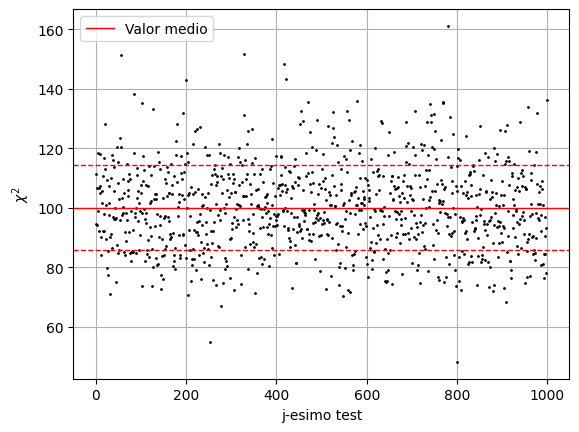

In [4]:
j, chi2_calc = np.loadtxt("OUTPUT/chi2_values.dat", usecols=(0,1), delimiter=' ', unpack='true')

plt.plot(j,chi2_calc, color='black', marker='.', linestyle=' ', markersize=2, linewidth=0.3)
plt.axhline(y=np.mean(chi2_calc), color='red', linewidth=1, label='Valor medio')
plt.axhline(y=np.mean(chi2_calc)+np.std(chi2_calc), color='red', linewidth=1, linestyle='dashed')
plt.axhline(y=np.mean(chi2_calc)-np.std(chi2_calc), color='red', linewidth=1, linestyle='dashed')
plt.xlabel('j-esimo test')
plt.ylabel('$\chi^2$')
plt.grid(True)
plt.legend()
plt.show()

I valori di $\chi^2$ ottenuti oscillano molto, tuttavia il loro valor medio è compatibile con il valore atteso 100.
Confrontando l'istogramma dei valori di $\chi^2$ ottenuti con la distribuzione di probabilità di chi quadro, è evidente che i valori ottenuti seguano tale distribuzione.

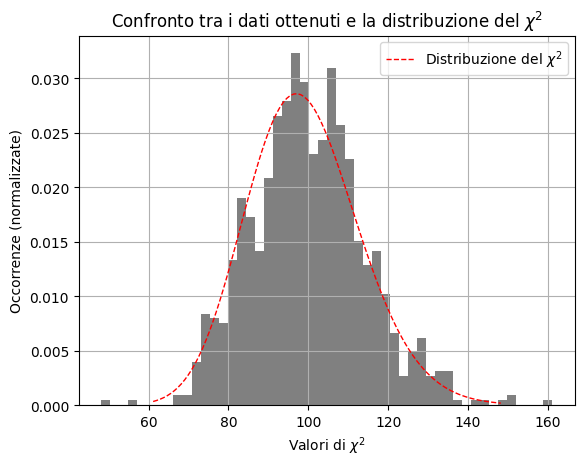

In [18]:
from scipy.stats import chi2

gdl = 100-1

x_chi = np.linspace(chi2.ppf(0.001, gdl), chi2.ppf(0.999, gdl),100)
plt.plot(x_chi, chi2.pdf(x_chi, gdl), lw=1, c='r', linestyle='dashed', label='Distribuzione del $\chi^2$')
plt.hist(chi2_calc, density='1', color='gray', bins=50)
plt.title('Confronto tra i dati ottenuti e la distribuzione del $\chi^2$')
plt.xlabel('Valori di $\chi^2$')
plt.ylabel('Occorrenze (normalizzate)')
plt.legend()
plt.grid(1)
plt.show()

### Esercizio 01.2

L'esercizio richiede di studiare come si distribuisca, al crescere di $N$, la variabile somma $$ A_{N} = \frac{1}{N}\sum_{n=1}^{N}x_{n} $$
nel caso di $x_{n}$ variabili pseudo-randomiche indipendenti ed identicamente distribuite, estratte da:
- una distribuzione uniforme in $[0,1)$
- una distribuzione esponenziale (avente $\lambda=1$)
- una distribuzione di Cauchy-Lorentz (con $\mu=0$ and $\Gamma=1$).

Le prime due distribuzioni, avendo primo e secondo momento finiti, soddisfano il Teorema del Limite Centrale (CLT) ed appartengono quindi al bacino di attrazione della gaussiana. La terza distribuzione, avendo secondo momento infinito, non soddisfa le ipotesi del CLT ma appartiene al bacino di attrazione della distribuzione di Cauchy-Lorentz.

Ho quindi costruito un istogramma con $10^{4}$ realizzazioni di $A_N = \frac{1}{N}\sum_{i=1}^N x_i$ (con $N=1, 2, 10, 100$), con $x_{i}$ estratte dalle distribuzioni citate sopra.  Ho quindi verificato che al crescere di $N$, la somma delle variabili estratte con le prime due distribuzioni sia approssimata sempre meglio da una Gaussiana. Invece, al crescere di $N$, la somma delle variabili estratte con la terza distribuzione è approssimata da una distribuzione di Cauchy-Lorentz.

Confrontando l'andamento della distribuzione di $A_{N}$, al crescere di $N$, per le prime due distribuzioni, è possibile osservare che la velocità di convergenza alla distribuzione gaussiana è maggiore nel caso della distribuzione uniforme rispetto alla distribuzione esponenziale.

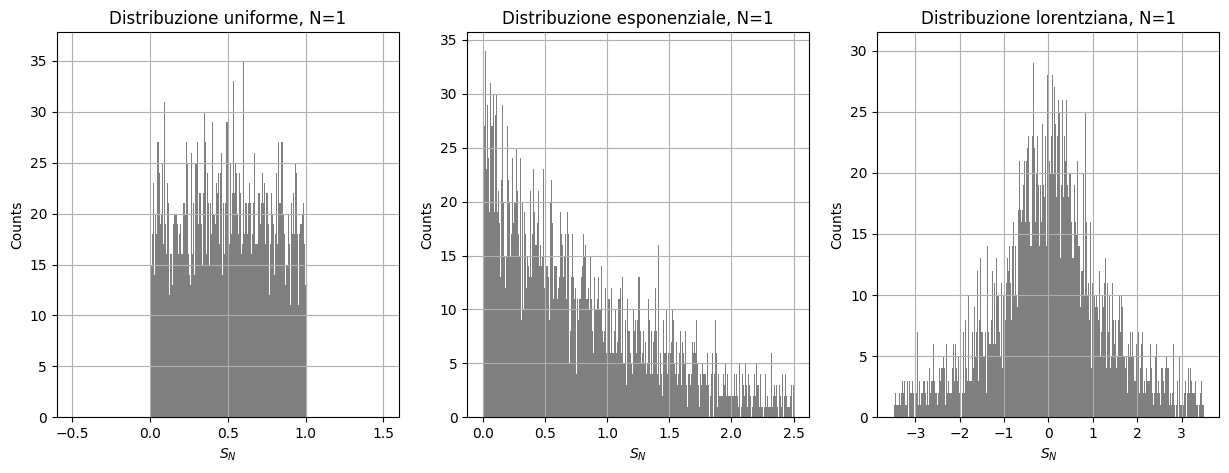

In [25]:
lin, exp, cauchy= np.loadtxt("OUTPUT/N1.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# the histogram of the data
n_bins = 1000
n, bins, patches = axs[0].hist(lin, n_bins, range=(-0.5,1.5), color='gray')
n, bins, patches = axs[1].hist(exp, n_bins, range=(0,2.5), color='gray')
n, bins, patches = axs[2].hist(cauchy, n_bins, range=(-3.5,3.5), color='gray')

axs[0].set_xlabel('$S_{N}$')
axs[0].set_ylabel('Counts')
axs[0].set_title('Distribuzione uniforme, N=1')
axs[0].grid(True)

axs[1].set_xlabel('$S_{N}$')
axs[1].set_ylabel('Counts')
axs[1].set_title('Distribuzione esponenziale, N=1')
axs[1].grid(True)

axs[2].set_xlabel('$S_{N}$')
axs[2].set_ylabel('Counts')
axs[2].set_title('Distribuzione lorentziana, N=1')
axs[2].grid(True)

plt.show()

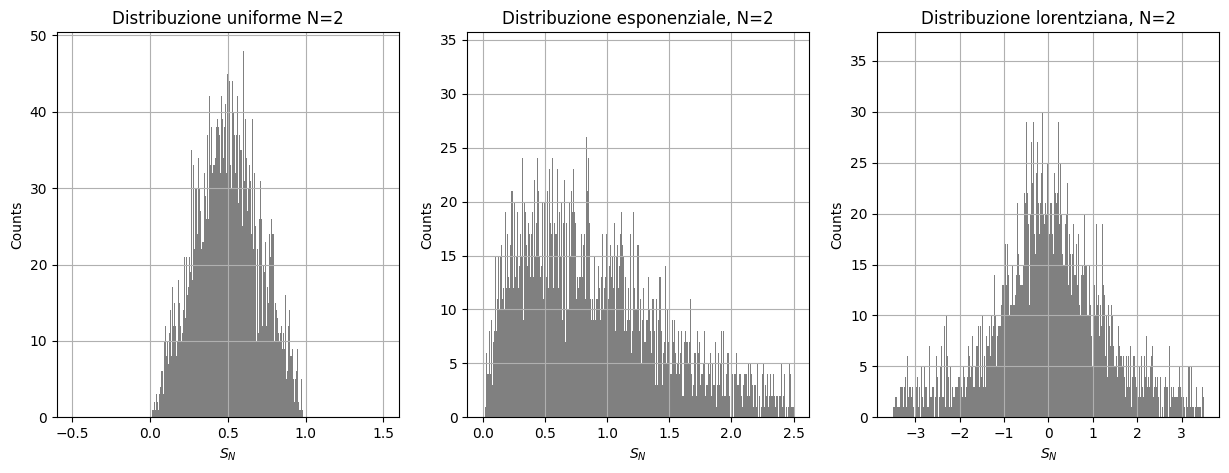

In [26]:
lin, exp, cauchy= np.loadtxt("OUTPUT/N2.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# the histogram of the data
n_bins = 1000
n, bins, patches = axs[0].hist(lin, n_bins, range=(-0.5,1.5), color='gray')
n, bins, patches = axs[1].hist(exp, n_bins, range=(0,2.5), color='gray')
n, bins, patches = axs[2].hist(cauchy, n_bins, range=(-3.5,3.5), color='gray')

axs[0].set_xlabel('$S_{N}$')
axs[0].set_ylabel('Counts')
axs[0].set_title('Distribuzione uniforme N=2')
axs[0].grid(True)

axs[1].set_xlabel('$S_{N}$')
axs[1].set_ylabel('Counts')
axs[1].set_title('Distribuzione esponenziale, N=2')
axs[1].grid(True)

axs[2].set_xlabel('$S_{N}$')
axs[2].set_ylabel('Counts')
axs[2].set_title('Distribuzione lorentziana, N=2')
axs[2].grid(True)

plt.show()

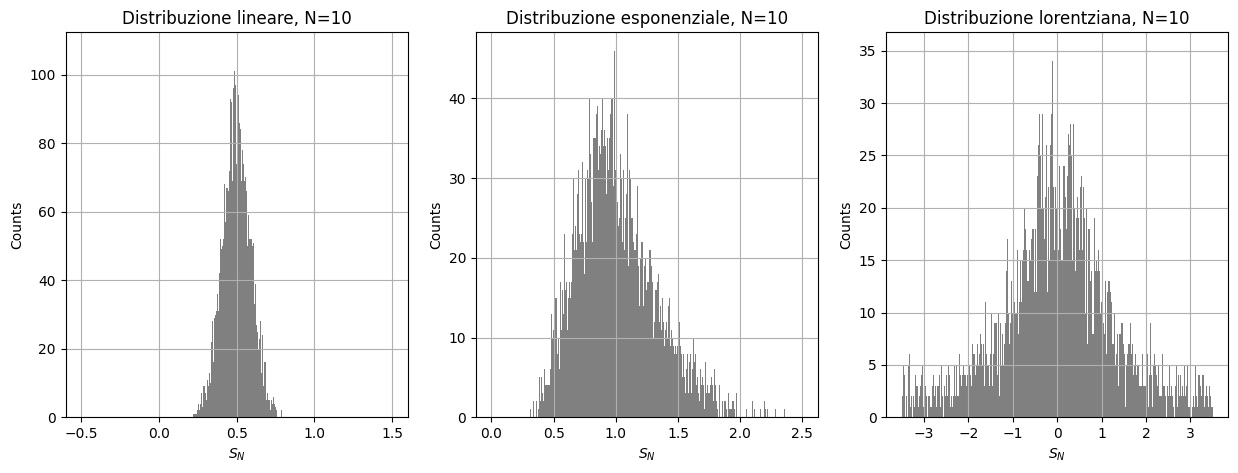

In [27]:
lin, exp, cauchy= np.loadtxt("OUTPUT/N10.dat", usecols=(0,1,2), delimiter=' ', unpack='true')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# the histogram of the data
n_bins = 1000
n, bins, patches = axs[0].hist(lin, n_bins, range=(-0.5,1.5), color='gray')
n, bins, patches = axs[1].hist(exp, n_bins, range=(0,2.5), color='gray')
n, bins, patches = axs[2].hist(cauchy, n_bins, range=(-3.5,3.5), color='gray')

axs[0].set_xlabel('$S_{N}$')
axs[0].set_ylabel('Counts')
axs[0].set_title('Distribuzione lineare, N=10')
axs[0].grid(True)

axs[1].set_xlabel('$S_{N}$')
axs[1].set_ylabel('Counts')
axs[1].set_title('Distribuzione esponenziale, N=10')
axs[1].grid(True)

axs[2].set_xlabel('$S_{N}$')
axs[2].set_ylabel('Counts')
axs[2].set_title('Distribuzione lorentziana, N=10')
axs[2].grid(True)

plt.show()

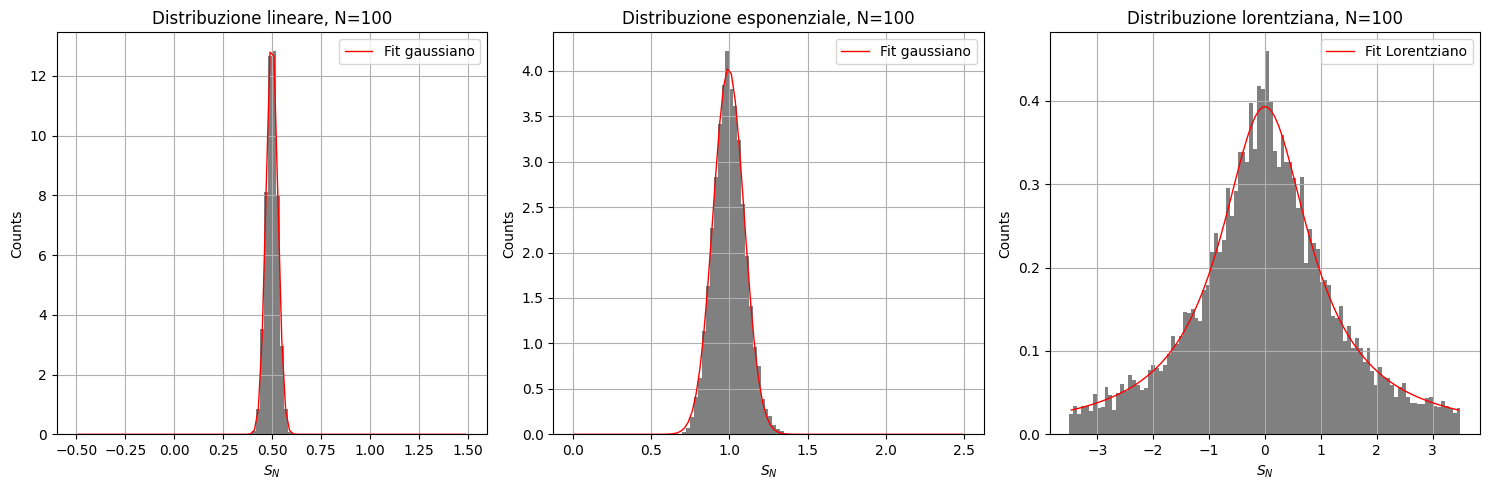

In [28]:
from scipy.optimize import curve_fit
lin, exp, cauchy = np.loadtxt("OUTPUT/N100.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

def gaussian(x, amp, mean, stddev):
    return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

def lorentzian(x, amp, mean, gamma):
    return amp * gamma**2 / ((x - mean)**2 + gamma**2)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

n_bins = 100

n_lin, bins_lin, patches_lin = axs[0].hist(lin, n_bins, range=(-0.5, 1.5), density=True, color='gray')
bin_centers_lin = (bins_lin[:-1] + bins_lin[1:]) / 2
popt_lin, _ = curve_fit(gaussian, bin_centers_lin, n_lin, p0=[1, 0.5, 0.1])
axs[0].plot(bin_centers_lin, gaussian(bin_centers_lin, *popt_lin), color='r', lw=1, label='Fit gaussiano')

n_exp, bins_exp, patches_exp = axs[1].hist(exp, n_bins, range=(0, 2.5), density=True, color='gray')
bin_centers_exp = (bins_exp[:-1] + bins_exp[1:]) / 2
popt_exp, _ = curve_fit(gaussian, bin_centers_exp, n_exp, p0=[1, 1, 0.5])
axs[1].plot(bin_centers_exp, gaussian(bin_centers_exp, *popt_exp), color='r', lw=1, label='Fit gaussiano')

n_cauchy, bins_cauchy, patches_cauchy = axs[2].hist(cauchy, n_bins, range=(-3.5, 3.5), density=True, color='gray')
bin_centers_cauchy = (bins_cauchy[:-1] + bins_cauchy[1:]) / 2
popt_cauchy, _ = curve_fit(lorentzian, bin_centers_cauchy, n_cauchy, p0=[1, 0, 1])
axs[2].plot(bin_centers_cauchy, lorentzian(bin_centers_cauchy, *popt_cauchy), color='r', lw=1, label='Fit Lorentziano')

axs[0].set_xlabel('$S_{N}$')
axs[0].set_ylabel('Counts')
axs[0].set_title('Distribuzione lineare, N=100')
axs[0].grid(True)
axs[0].legend()

axs[1].set_xlabel('$S_{N}$')
axs[1].set_ylabel('Counts')
axs[1].set_title('Distribuzione esponenziale, N=100')
axs[1].grid(True)
axs[1].legend()

axs[2].set_xlabel('$S_{N}$')
axs[2].set_ylabel('Counts')
axs[2].set_title('Distribuzione lorentziana, N=100')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

### Esercizio 01.3

Il programma implementa una simulazione per stimare il valore di $\pi$ attraverso l'esperimento dell'ago di Buffon. L'idea centrale dell'esperimento è lanciare un ago di lunghezza $L$ su una superficie piana con linee parallele poste a distanza $d$ l'una dall'altra. A partire dalla probabilità $P$ che l'ago intersechi una di queste linee, lanciando l'ago $N_{throws}$ volte e osservandolo cadere sopra una linea $N_{hit}$ volte, è possibile stimare il valore di $\pi$:
$$ P = \frac{2L}{Pd}=\lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}.$$

Ho impostato la lunghezza dell'ago $d=9$ e la distanza tra le linee $L=10$. I valori sono scelti arbitrariamente, purché $L<d$, per evitare casi di intersezione multipla.

Ho effettuato $2 \cdot 10^6$ lanci dell'ago, suddivisi in $N=200$ blocchi. 

Per ogni blocco, viene eseguito un ciclo che simula $N_{throws}=10^4$ lanci dell'ago. Ogni lancio genera una posizione casuale $y$ per un'estremità dell'ago e un angolo casuale $\phi$. Entrambi i valori sono estratti da una distribuzione uniforme (0, RAND_MAX). Se l'ago è orientato verso il basso (cioè $\sin(\phi)<0$), la posizione $y$ viene modificata per riflettere la posizione dell'altra estremità dell'ago, in modo da avere sempre come $y$ l'estremità inferiore.
Viene inoltre calcolato l'indice $n$, che determina in quale "banda verticale" si posiziona l'estremità inferiore dell'ago: $n=int(y/d)$.
Successivamente, viene determinato se l'ago interseca una delle linee. Questo controllo si basa sulla somma della posizione $y$ e della proiezione verticale della lunghezza dell'ago ($y+L*abs(sin(\phi))$ rispetto alla distanza tra le linee ($d$). In particolare, questa somma supera $(n+1)*d$, si considera che l'ago intersechi una linea e il contatore delle intersezioni ($N_{hits}$) viene incrementato.

L'errore della misura ottenuta ad ogni blocco è stato valutato come deviazione standard del valor medio.

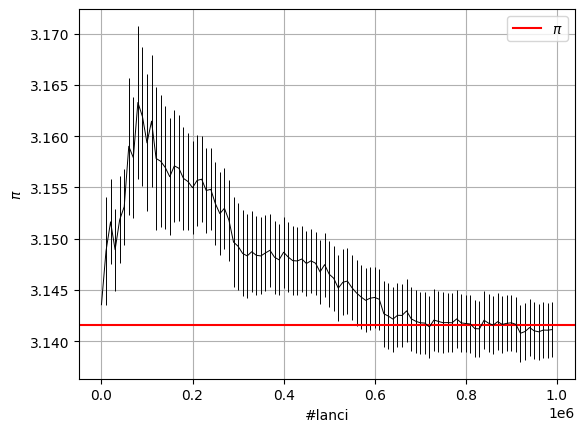

In [30]:
x, pi, error = np.loadtxt("OUTPUT/pi_values.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,pi,yerr=error, color='black', linewidth=0.7)
plt.xlabel('#lanci')
plt.ylabel('$\pi$')
plt.axhline(y=3.1415926535, color='red', label='$\pi$')
plt.legend()
plt.grid(True)
plt.show()